# **PRÁCTICA 2: AUTOENCODERS - Parte 2: Convolucionales**
### Universitat de València, Escola Tecnica Superior d'Enginyeria
### Elena Marrero Castellano | 4ª curso del Grado Ciencia de Datos

Autoencoders con Keras

https://blog.keras.io/building-autoencoders-in-keras.html

## Laboratorio

### Autoencoder convolucional

**Codificador automático convolucional**

<p align="justify">Dado que nuestras entradas son imágenes, tiene sentido utilizar redes neuronales convolucionales (convnets) como codificadores y decodificadores. En entornos prácticos, los codificadores automáticos aplicados a las imágenes son siempre codificadores automáticos convolucionales, simplemente funcionan mucho mejor.</p>

<p align="justify">Implementemos uno. El codificador consistirá en una pila de capas Conv2Dy MaxPooling2D(la agrupación máxima se utiliza para el muestreo descendente espacial), mientras que el decodificador consistirá en una pila de capas Conv2Dy .UpSampling2D.</p>

<p align="justify">Es decir, comenzaremos de manera simple, con una sola capa neuronal completamente conectada como codificador y decodificador:</p>

In [ ]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
# MODELO

# ENCODER activity_regularizer (parámentro de las Dense); activity_regularizer = regularizers.l1(0.01)
input_img = Input(shape=(28, 28, 1))  
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# DECODER
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


In [ ]:
opt = Adam(learning_rate=0.0001)
autoencoder0 = Model(input_img, decoded)
autoencoder0.compile(optimizer=opt, loss='mse')

In [ ]:
autoencoder0.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584   

<p align="justify">Para entrenarlo, usaremos los dígitos MNIST originales:</p>

In [ ]:
# DATOS
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) 
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  

11501568/11490434 [==============================] - 0s 0us/step


<p align="justify">Entrenemos este modelo durante 100 épocas.</p>

In [ ]:
# ENTRENAMIENTO
from keras.callbacks import TensorBoard

autoencoder0.fit(x_train, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 17s 14ms/step - loss: 0.1166 - val_loss: 0.0681
Epoch 2/100
469/469 [==============================] - 5s 12ms/step - loss: 0.0558 - val_loss: 0.0475
Epoch 3/100
469/469 [==============================] - 5s 12ms/step - loss: 0.0433 - val_loss: 0.0397
Epoch 4/100
469/469 [==============================] - 6s 12ms/step - loss: 0.0379 - val_loss: 0.0356
Epoch 5/100
469/469 [==============================] - 5s 12ms/step - loss: 0.0342 - val_loss: 0.0322
Epoch 6/100
469/469 [==============================] - 6s 12ms/step - loss: 0.0312 - val_loss: 0.0296
Epoch 7/100
469/469 [==============================] - 5s 12ms/step - loss: 0.0289 - val_loss: 0.0275
Epoch 8/100
469/469 [==============================] - 6s 12ms/step - loss: 0.0270 - val_loss: 0.0259
Epoch 9/100
469/469 [==============================] - 6s 13ms/step - loss: 0.0256 - val_loss: 0.0246
Epoch 10/100
469/469 [==============================] - 6s 12ms/step - loss: 0.02

<p align="justify">Después de 100 épocas, el codificador automático parece alcanzar un valor de pérdida de validación/entrenamiento estable de aproximadamente 0.0122. Podemos intentar visualizar las entradas reconstruidas y las representaciones codificadas. Usaremos Matplotlib en el siguiente apartado.</p>

## **Ejercicios**

### **Ejercicio 1: Comprueba la reconstrucción**
---




<p align="justify">Echemos un vistazo a los dígitos reconstruidos.</p>

Imágenes originales


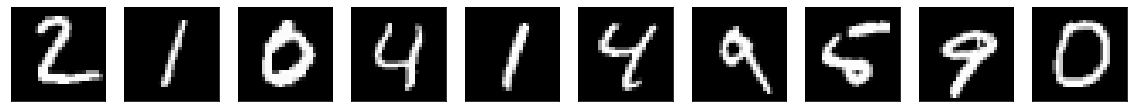

Reconstrucción (salida del decoder):


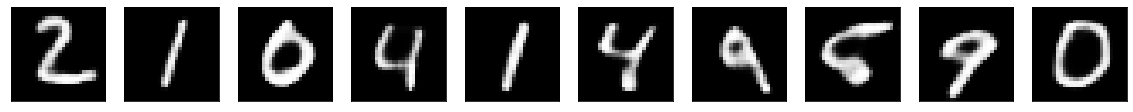

In [ ]:
import matplotlib.pyplot as plt
n=10
decoded_imgs0 = autoencoder0.predict(x_test)

plt.figure(figsize=(20, 4))
print("Imágenes originales")
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20, 4))
print("Reconstrucción (salida del decoder):")
for i in range(1, n + 1):
    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs0[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

<p align="justify">Esto es lo que obtenemos. La fila superior son los dígitos originales y la fila inferior son los dígitos reconstruidos.</p>

<p align="justify">También podemos echar un vistazo a las representaciones codificadas de 128 dimensiones. Estas representaciones son 8x4x4, por lo que las remodelamos a 4x32 para poder mostrarlas como imágenes en escala de grises.</p>

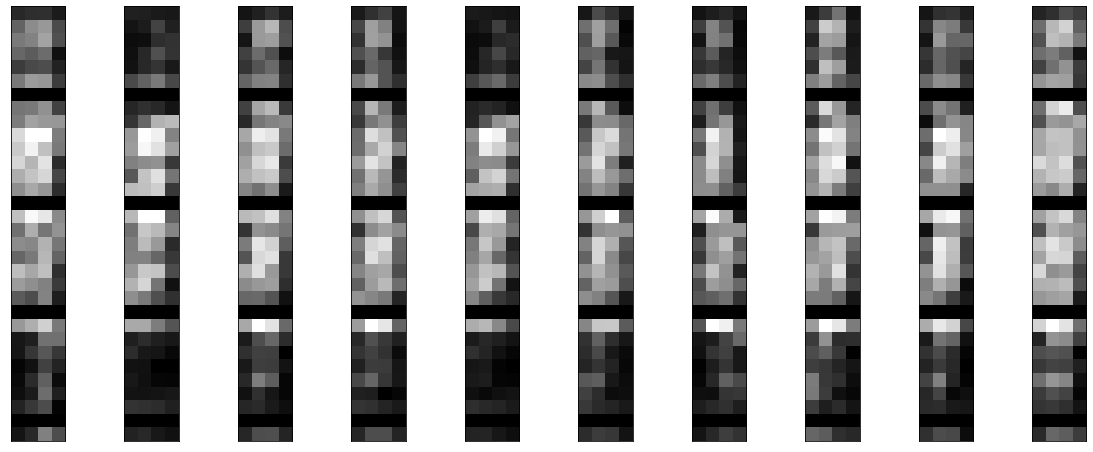

In [ ]:
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape((4, 4 * 8)).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### **Ejercicio 2: Aplícalo para limpieza de ruido**
---

<p align="justify">Pongamos nuestro codificador automático convolucional a trabajar en un problema de eliminación de ruido de imagen. Es simple: entrenaremos al codificador automático para mapear imágenes de dígitos ruidosos para imágenes de dígitos limpios.</p>

<p align="justify">Así es como generaremos dígitos ruidosos sintéticos: simplemente aplicamos una matriz de ruido gaussiano y recortamos las imágenes entre 0 y 1.</p>

In [ ]:
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
import numpy as np
from keras import layers
from keras.callbacks import TensorBoard

In [ ]:
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

11501568/11490434 [==============================] - 0s 0us/step


<font color='green'><p align="justify">Así es como se ven los dígitos ruidosos:</font></p>

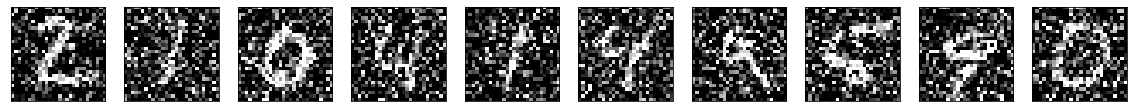

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

<font color='green'><p align="justify">Si entrecierras los ojos, aún puedes reconocerlos, pero apenas. ¿Puede nuestro autocodificador aprender a recuperar los dígitos originales? Vamos a averiguar. En comparación con el codificador automático convolucional anterior, para mejorar la calidad de la reconstrucción, usaremos un modelo ligeramente diferente con más filtros por capa:</font></p>

In [ ]:
input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded_noisy = layers.MaxPooling2D((2, 2), padding='same')(x)

# At this point the representation is (7, 7, 32)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded_noisy)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded_noisy = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder_noisy = keras.Model(input_img, decoded_noisy)
autoencoder_noisy.compile(optimizer='adam', loss='binary_crossentropy')

<font color='green'><p align="justify">Entrenémoslo para 100 épocas:</font></p>

In [ ]:
autoencoder_noisy.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
469/469 [==============================] - 18s 15ms/step - loss: 0.1696 - val_loss: 0.1175
Epoch 2/100
469/469 [==============================] - 7s 14ms/step - loss: 0.1130 - val_loss: 0.1090
Epoch 3/100
469/469 [==============================] - 7s 14ms/step - loss: 0.1074 - val_loss: 0.1044
Epoch 4/100
469/469 [==============================] - 7s 14ms/step - loss: 0.1045 - val_loss: 0.1024
Epoch 5/100
469/469 [==============================] - 7s 14ms/step - loss: 0.1027 - val_loss: 0.1009
Epoch 6/100
469/469 [==============================] - 7s 14ms/step - loss: 0.1014 - val_loss: 0.1000
Epoch 7/100
469/469 [==============================] - 7s 14ms/step - loss: 0.1003 - val_loss: 0.0990
Epoch 8/100
469/469 [==============================] - 7s 14ms/step - loss: 0.0995 - val_loss: 0.0983
Epoch 9/100
469/469 [==============================] - 7s 14ms/step - loss: 0.0988 - val_loss: 0.0977
Epoch 10/100
469/469 [==============================] - 7s 14ms/step - loss: 0.09

KeyboardInterrupt: ignored

<font color='green'><p align="justify">Ahora echemos un vistazo a los resultados. Arriba, los dígitos ruidosos alimentados a la red, y abajo, los dígitos son reconstruidos por la red.</font></p>

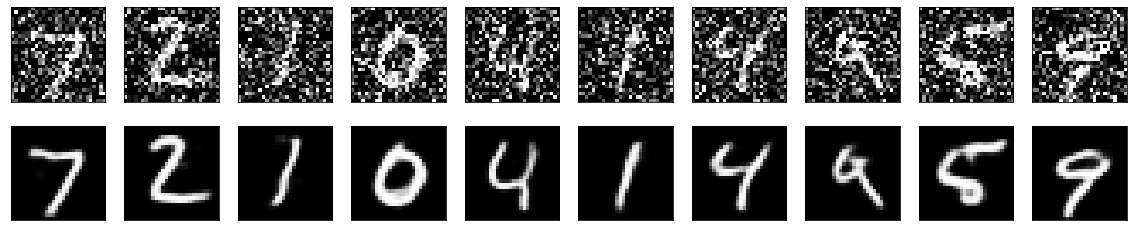

In [ ]:
import matplotlib.pyplot as plt

encoded_imgs = autoencoder_noisy.predict(x_test_noisy)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### **Ejercicio 3: Aplícalo para detección de anomalías**
---

<p align="justify">Continuando con la convolucional del laboratorio, vamos a ver si existen outliers sin meterle ruido. Realizamos los mismos pasos que en los apartados de la Parte 1 de detección de anomalías.</p>

In [ ]:
decoded_imgs3 = autoencoder0.predict(x_test)
error_tes = np.mean(np.abs(x_test-decoded_imgs3)**2,tuple(range(1, decoded_imgs3.ndim)))

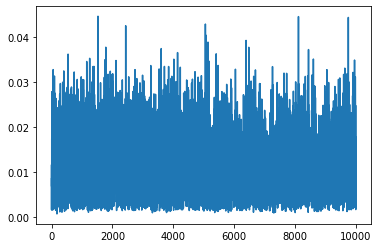

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline
plt.figure
plt.plot(error_tes,label="error_test")

In [ ]:
#Seleccionar el threshold a partir del error de reconstrucción (por ejemplo  error_test > 0.04)
img_anomala=error_tes>0.035
# Nos devuelve los indices que dan TRUE
index_anomalies=np.where(img_anomala)[0]
print(index_anomalies)

[ 543 1253 1526 1782 2436 3604 4018 4140 5054 5078 5140 5409 6391 6480
 8112 8442 8602 9750]


<p align="justify">Mostramos las imágenes con mayor error de reconstrucción en la base de datos.

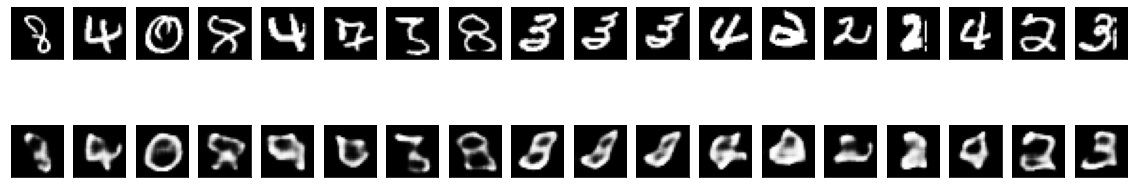

In [ ]:
import matplotlib.pyplot as plt

j=0
plt.figure(figsize=(20, 4))
for i in index_anomalies:
    # display original
    ax = plt.subplot(2, len(index_anomalies), j + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruccion
    ax = plt.subplot(2, len(index_anomalies), j + 1 + len(index_anomalies))
    plt.imshow(decoded_imgs3[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    j=j+1
plt.show()

### **Ejercicio 4: Modifica la arquitectura para que funcione con cifar 10**
---

In [ ]:
from keras.datasets import cifar10
from keras.layers import Input, Dense,Conv2D,MaxPooling2D,UpSampling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.models import Model,Sequential
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(X_train, _), (X_test, _) = cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [ ]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

X_train = X_train.reshape(len(X_train),X_train.shape[1],X_train.shape[2],3)
X_test = X_test.reshape(len(X_test), X_test.shape[1],X_test.shape[2],3)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
input_img = Input(shape=(32,32,3))

#Encoder
x = Conv2D(16,(3,3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
x = MaxPooling2D((2,2), padding='same')(x)

x = Conv2D(8,(3,3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2,2), padding='same', name='encoder')(x)

#Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(16, (3, 3), activation='relu',padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

In [ ]:
opt = Adam(learning_rate=0.0001)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=opt, loss='mse')

In [ ]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 8)         1160      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 8, 8, 8)           584 

In [ ]:
# ENTRENAMIENTO
from keras.callbacks import TensorBoard

autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/50
196/196 [==============================] - 6s 29ms/step - loss: 0.0116 - val_loss: 0.0116
Epoch 2/50
196/196 [==============================] - 5s 27ms/step - loss: 0.0116 - val_loss: 0.0116
Epoch 3/50
196/196 [==============================] - 5s 26ms/step - loss: 0.0116 - val_loss: 0.0116
Epoch 4/50
196/196 [==============================] - 5s 26ms/step - loss: 0.0116 - val_loss: 0.0116
Epoch 5/50
196/196 [==============================] - 5s 27ms/step - loss: 0.0116 - val_loss: 0.0116
Epoch 6/50
196/196 [==============================] - 5s 26ms/step - loss: 0.0116 - val_loss: 0.0116
Epoch 7/50
196/196 [==============================] - 5s 28ms/step - loss: 0.0116 - val_loss: 0.0116
Epoch 8/50
196/196 [==============================] - 5s 27ms/step - loss: 0.0116 - val_loss: 0.0116
Epoch 9/50
196/196 [==============================] - 5s 27ms/step - loss: 0.0116 - val_loss: 0.0116
Epoch 10/50
196/196 [==============================] - 5s 28ms/step - loss: 0.0116 - val_lo

In [ ]:
predicted = autoencoder.predict(X_test)

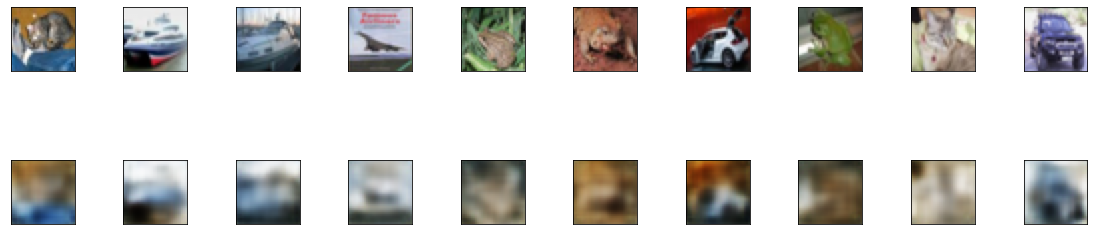

In [ ]:
plt.figure(figsize=(40,4))
for i in range(10):
    # display original images
    ax = plt.subplot(3, 20, i + 1)
    plt.imshow(X_test[i].reshape(32, 32,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    # display reconstructed images
    ax = plt.subplot(3, 20, 2*20 +i+ 1)
    plt.imshow(predicted[i].reshape(32, 32,3))
    #plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
   
plt.show()

### **Ejercicio Extra 1: Incluye regularización de actividad en el dominio interno y compara los resultados**
---

In [ ]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

In [ ]:
# MODELO

# ENCODER 
input_img = Input(shape=(28, 28, 1))  
x = Conv2D(16, (3, 3), activation='relu', padding='same',activity_regularizer = regularizers.l1(0.01))(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# DECODER
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)


In [ ]:
opt = Adam(learning_rate=0.0001)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=opt, loss='mse')

In [ ]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 8)           584 

In [ ]:
# DATOS
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) 
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  

In [ ]:
# ENTRENAMIENTO
from keras.callbacks import TensorBoard

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Epoch 1/100
469/469 [==============================] - 8s 14ms/step - loss: 1.2809 - val_loss: 0.5626
Epoch 2/100
469/469 [==============================] - 8s 17ms/step - loss: 0.2803 - val_loss: 0.1251
Epoch 3/100
469/469 [==============================] - 10s 21ms/step - loss: 0.0951 - val_loss: 0.0784
Epoch 4/100
469/469 [==============================] - 8s 18ms/step - loss: 0.0727 - val_loss: 0.0693
Epoch 5/100
469/469 [==============================] - 6s 13ms/step - loss: 0.0674 - val_loss: 0.0660
Epoch 6/100
469/469 [==============================] - 6s 12ms/step - loss: 0.0648 - val_loss: 0.0638
Epoch 7/100
469/469 [==============================] - 5s 12ms/step - loss: 0.0628 - val_loss: 0.0619
Epoch 8/100
469/469 [==============================] - 6s 12ms/step - loss: 0.0611 - val_loss: 0.0602
Epoch 9/100
469/469 [==============================] - 6s 12ms/step - loss: 0.0595 - val_loss: 0.0588
Epoch 10/100
469/469 [==============================] - 5s 11ms/step - loss: 0.05

In [ ]:
# convolucional
decoded_imgs0 = autoencoder0.predict(x_test)

In [ ]:
# convolucional + regularizador
decoded_imgs1 = autoencoder.predict(x_test)

Imágenes originales


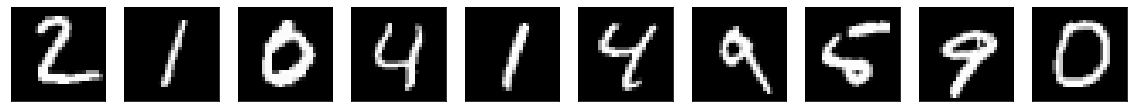

Reconstrucción (convolucional):


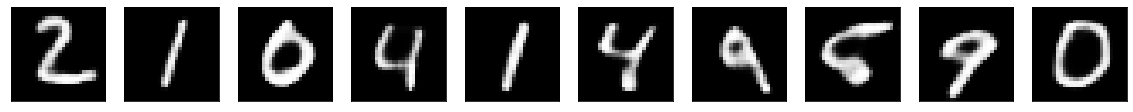

Reconstrucción (convolucional + regularizador):


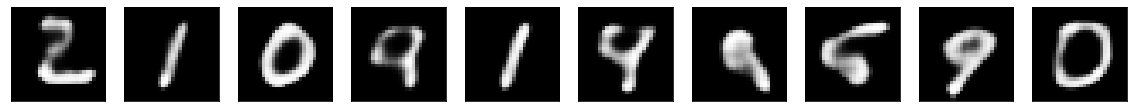

In [ ]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 4))
print("Imágenes originales")
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20, 4))
print("Reconstrucción (convolucional):")
for i in range(1, n + 1):
    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs0[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

plt.figure(figsize=(20, 4))
print("Reconstrucción (convolucional + regularizador):")
for i in range(1, n + 1):
    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs1[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

<p align="justify">Las estrategias de regularización incorporan penalizaciones en el ajuste por mínimos cuadrados ordinarios (OLS) con el objetivo de evitar overfitting, reducir varianza, atenuar el efecto de la correlación entre predictores y minimizar la influencia en el modelo de los predictores menos relevantes. Por lo general, aplicando regularización se consigue modelos con mayor poder predictivo (generalización).</font></p>


<p align="justify">Los regularizadores le permiten aplicar penalizaciones en los parámetros de la capa o la actividad de la capa durante la optimización. Estas penalizaciones se suman a la función de pérdida que optimiza la red. En este caso se ha añadido un regularizador de actividad, este aplica una penalización en la salida de la capa.</font></p>

<p align="justify">Por lo tanto, podemos decir que como regularizador de actividad lo que hace es penalizar la actividad de la capa, consiguiendo así que generalice mejor y que no entremos en sobre ajuste, por lo tanto, será puede pasar como en este caso que la recontrucción nos salga peor. </p>

### **Ejercicio Extra 2: Corre el siguiente código con una imagen de tu cara**

		https://www.tensorflow.org/tutorials/images/segmentation
---
		

<p align="justify">Este apartado está resuelto en otro notebook. Nombre del documento: "Ejercicio P2.Extra2".</p>